In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import statsmodels
import statsmodels.api as sm

from sklearn import svm
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score 

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [ ]:
df_beneficiary=pd.read_csv(r'D:\SEMESTER-2\2121(FOUNDATION OF DATASCIENCE\Train_Beneficiarydata-1542865627584.csv\Train_Beneficiarydata-1542865627584.csv')

In [ ]:
df_beneficiary.shape

(138556, 25)

In [ ]:
df_beneficiary['Gender'].value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

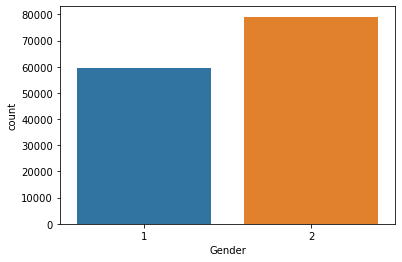

In [ ]:
sns.countplot(df_beneficiary['Gender'])

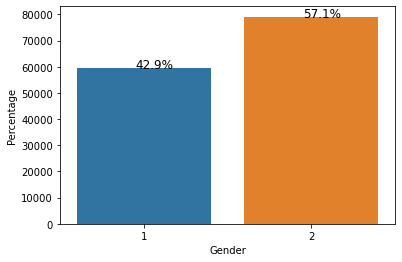

In [ ]:
ax = sns.countplot(x='Gender', data=df_beneficiary)
total = len(df_beneficiary['Gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)
plt.ylabel('Percentage')
plt.show()

Inference:
1. Gender 1.0 is 42.91% Gender 2.0 is 57.09%

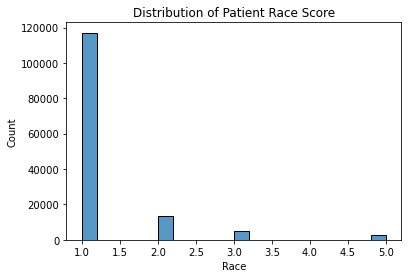

In [ ]:
sns.histplot(df_beneficiary['Race'], bins=20)
plt.title('Distribution of Patient Race Score')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

Inference:
1. RAC Score of 1 has more number of patients
2. There are 11786 people with RAC 1.0 score which means they are healthy



In [ ]:
df_beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [ ]:
df_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
df_final3 = pd.read_csv('df1_final.csv')

In [ ]:
df_final3

,Unnamed: 0,Provider,BeneID,DOB,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,...,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,PotentialFraud
0,0,PRV55912,BENE11001,1943-01-01,1943,1,1,39,230,12,...,PHY390922,PHY330576,PHY412132,7866,1970,4019,5853,7843,2768,1
1,1,PRV55912,BENE17521,1913-12-01,1913,2,1,39,230,12,...,PHY349293,PHY370861,PHY363291,45340,4240,2639,2948,40390,45821,1
2,2,PRV55912,BENE21718,1922-10-01,1922,1,1,39,600,12,...,PHY334706,PHY334706,PHY412132,V5789,V5789,4168,73313,7812,7993,1
3,3,PRV55912,BENE22934,1930-07-01,1930,2,1,39,280,12,...,PHY390614,PHY323689,PHY363291,71946,71535,71960,4019,V1202,4240,1
4,4,PRV55912,BENE24402,1925-09-01,1925,2,2,39,510,12,...,PHY380413,PHY432598,PHY412132,1748,2330,4019,4019,4019,4019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,558206,PRV54302,BENE154687,1927-05-01,1927,1,2,25,150,12,...,PHY376238,PHY376238,PHY412132,99639,99661,4019,4019,4019,4019,0
558207,558207,PRV57762,BENE157252,1942-01-01,1942,1,1,21,230,12,...,PHY432730,PHY330576,PHY412132,1748,2330,4019,4019,4019,4019,0
558208,558208,PRV51577,BENE157378,1946-06-01,1946,2,1,5,200,12,...,PHY338096,PHY330576,PHY412132,V7612,5854,7907,4019,4019,4019,0
558209,558209,PRV53083,BENE158295,1924-08-01,1924,2,1,16,490,12,...,PHY416646,PHY330576,PHY412132,V7612,42789,4019,4019,4019,4019,0


In [ ]:


df_final3.columns

Index(['Unnamed: 0', 'Provider', 'BeneID', 'DOB', 'Year of Birth', 'Gender',
       'Race', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'PatientRiskScore', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt', 'TotalReimbursement',
       'InscClaimAmtReimbursed', 'IPAnnualDeductibleAmt',
       'OPAnnualDeductibleAmt', 'TotalDeductibleamount', 'DeductibleAmtPaid',
       'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiag

In [ ]:
df_final3 = df_final3.drop('Unnamed: 0', axis=1)



In [ ]:
df_final3.shape

(558211, 44)

In [ ]:
#df_final3=df_final3.iloc[:,[27,0,1,43,2,3,5,6,7,8,4,9,10,11,12,13,14,15,16,17,18,19,40,20,22,41,28,21,23,42,33,24,25,26,29,30,31,32,34,35,36,37,38,39]]

In [ ]:
df_final3.head()

,Provider,BeneID,DOB,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,PotentialFraud
0,PRV55912,BENE11001,1943-01-01,1943,1,1,39,230,12,12,...,PHY390922,PHY330576,PHY412132,7866,1970,4019,5853,7843,2768,1
1,PRV55912,BENE17521,1913-12-01,1913,2,1,39,230,12,12,...,PHY349293,PHY370861,PHY363291,45340,4240,2639,2948,40390,45821,1
2,PRV55912,BENE21718,1922-10-01,1922,1,1,39,600,12,12,...,PHY334706,PHY334706,PHY412132,V5789,V5789,4168,73313,7812,7993,1
3,PRV55912,BENE22934,1930-07-01,1930,2,1,39,280,12,12,...,PHY390614,PHY323689,PHY363291,71946,71535,71960,4019,V1202,4240,1
4,PRV55912,BENE24402,1925-09-01,1925,2,2,39,510,12,12,...,PHY380413,PHY432598,PHY412132,1748,2330,4019,4019,4019,4019,1


In [ ]:
df_final3.columns

Index(['Provider', 'BeneID', 'DOB', 'Year of Birth', 'Gender', 'Race', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'PatientRiskScore', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt', 'TotalReimbursement',
       'InscClaimAmtReimbursed', 'IPAnnualDeductibleAmt',
       'OPAnnualDeductibleAmt', 'TotalDeductibleamount', 'DeductibleAmtPaid',
       'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 

In [ ]:
df_final3['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

<AxesSubplot:xlabel='PotentialFraud', ylabel='count'>

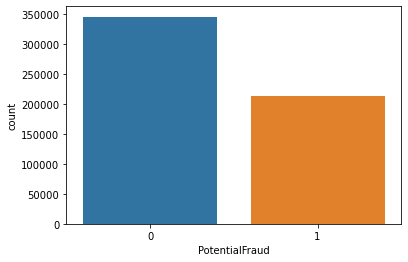

In [ ]:
sns.countplot(df_final3['PotentialFraud'])

In [ ]:
(df_final3['PotentialFraud'].value_counts()/len(df_final3))*100

0    61.878931
1    38.121069
Name: PotentialFraud, dtype: float64

####Separating the Target and Independent Variables

In [ ]:
df_final3.dtypes

Provider                            object
BeneID                              object
DOB                                 object
Year of Birth                        int64
Gender                               int64
Race                                 int64
State                                int64
County                               int64
NoOfMonths_PartACov                  int64
NoOfMonths_PartBCov                  int64
RenalDiseaseIndicator                int64
ChronicCond_Alzheimer                int64
ChronicCond_Heartfailure             int64
ChronicCond_KidneyDisease            int64
ChronicCond_Cancer                   int64
ChronicCond_ObstrPulmonary           int64
ChronicCond_Depression               int64
ChronicCond_Diabetes                 int64
ChronicCond_IschemicHeart            int64
ChronicCond_Osteoporasis             int64
ChronicCond_rheumatoidarthritis      int64
ChronicCond_stroke                   int64
PatientRiskScore                     int64
IPAnnualRei

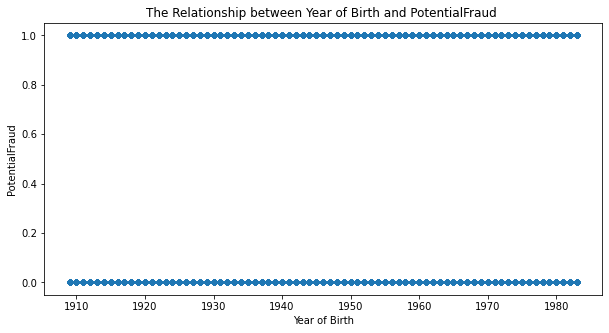

In [ ]:
df_final3.plot.scatter('Year of Birth','PotentialFraud',figsize = (10,5))
plt.title('The Relationship between Year of Birth and PotentialFraud ')
plt.show()

In [ ]:
# Create pivot table
pivot_table = pd.pivot_table(df_final3, index='Year of Birth', columns='PotentialFraud', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

In [ ]:
percentages

PotentialFraud,0,1
Year of Birth,,
1909,62.207944,37.792056
1910,61.411692,38.588308
1911,61.778619,38.221381
1912,59.759949,40.240051
1913,60.776119,39.223881
...,...,...
1979,57.923497,42.076503
1980,64.417178,35.582822
1981,65.034965,34.965035


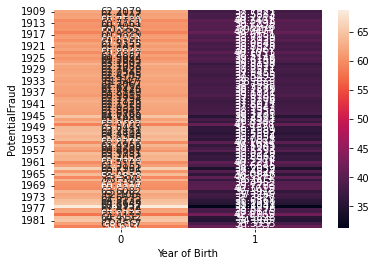

In [ ]:
# Create heatmap
sns.heatmap(percentages, annot=True, fmt='g')
plt.xlabel('Year of Birth')
plt.ylabel('PotentialFraud')
plt.show()

In [ ]:
percentage0 = percentages[0].sort_values(ascending=False)


In [ ]:
percentage0.head(20)

Year of Birth
1976    68.695652
1963    65.796098
1981    65.034965
1975    64.864865
1945    64.769853
1951    64.440774
1980    64.417178
1974    64.313222
1958    63.978127
1953    63.917526
1965    63.915416
1949    63.844919
1950    63.741073
1971    63.608184
1955    63.495507
1960    63.402572
1967    63.396972
1952    63.234614
1927    63.180230
1947    63.169320
Name: 0, dtype: float64

In [ ]:
percentage1 = percentages[1].sort_values(ascending=False)


In [ ]:
percentage1.head(20)

Year of Birth
1979    42.076503
1983    41.357027
1948    41.039798
1916    40.947712
1966    40.517241
1912    40.240051
1961    40.229087
1954    40.169432
1970    40.161527
1923    40.105096
1919    39.893925
1969    39.778325
1914    39.697846
1957    39.539287
1968    39.495225
1964    39.482415
1925    39.414559
1915    39.413989
1913    39.223881
1917    39.068100
Name: 1, dtype: float64

 Inference:However, individuals born in 1979 have a slightly higher potential fraud percentage compared to other birth years, followed by those born in 1983 and 1948. On the other hand, individuals born in 1917 and 1913 have a slightly lower potential fraud percentage compared to other birth years. Overall, the potential fraud percentage across different birth years is relatively similar.

In [ ]:
# Create pivot table
pivot_table = pd.pivot_table(df_final3, index='Race', columns='PotentialFraud', aggfunc='size')

# Calculate percentages
percentages1 = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

# Print percentages
percentages1

PotentialFraud,0,1
Race,,
1,62.137713,37.862287
2,63.544213,36.455787
3,54.542227,45.457773
5,55.964467,44.035533


 Inference:Percentage of potential fraud is higher for Race category 3 and 5 compared to Race categories 1 and 2. Specifically, for Race category 3, 45.46% of claims have been marked as potential fraud, while for Race category 5, 44.04% of claims have been marked as potential fraud. On the other hand, for Race categories 1 and 2, the percentage of potential fraud is lower at 37.86% and 36.46% respectively. 

<AxesSubplot:xlabel='TotalReimbursement', ylabel='count'>

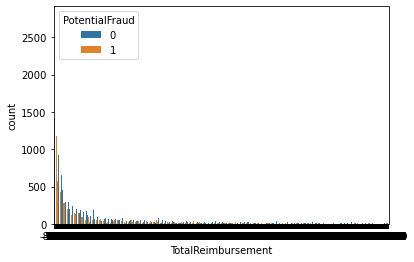

In [ ]:
import seaborn as sns

sns.countplot(data=df_final3, x='TotalReimbursement', hue='PotentialFraud')


In [ ]:
df_final3['State'].nunique()

52

In [ ]:
# Create pivot table
pivot_table = pd.pivot_table(df_final3, index='ChronicCond_Depression', columns='PotentialFraud', aggfunc='size')

# Calculate percentages
percentages1 = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

# Print percentages
percentages1

PotentialFraud,0,1
ChronicCond_Depression,,
1,61.853045,38.146955
2,61.898845,38.101155


Inference:The results show that the percentage of potential fraud cases is slightly higher for Chronic Condition Indicator of Depression=2 (38.101155%) compared to Depression=1 (38.146955%), indicating that depression may not be a strong predictor of potential fraud in this dataset. However, the difference between the two percentages is quite small, so further analysis may be needed to draw more robust conclusions.

In [ ]:
# Create pivot table
pivot_table = pd.pivot_table(df_final3, index='ChronicCond_Osteoporasis', columns='PotentialFraud', aggfunc='size')

# Calculate percentages
percentages2 = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

# Print percentages
percentages2

PotentialFraud,0,1
ChronicCond_Osteoporasis,,
1,61.794895,38.205105
2,61.918051,38.081949


In [ ]:
df_final3['ChronicCond_Osteoporasis'].nunique()

2

In [ ]:
# Numerical values in df_final_num

df_final_num=df_final3.select_dtypes(include=[np.number])
df_final_num.columns

Index(['Year of Birth', 'Gender', 'Race', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'PatientRiskScore', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt', 'TotalReimbursement',
       'InscClaimAmtReimbursed', 'IPAnnualDeductibleAmt',
       'OPAnnualDeductibleAmt', 'TotalDeductibleamount', 'DeductibleAmtPaid',
       'PotentialFraud'],
      dtype='object')

In [ ]:
df_final_num.shape

(558211, 29)

In [ ]:
# Categorical values in df_final_cat

df_final_cat=df_final3.select_dtypes(include=[np.object])
df_final_cat.columns

Index(['Provider', 'BeneID', 'DOB', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5'],
      dtype='object')

In [ ]:
df_final_cat.shape

(558211, 15)

In [ ]:
df_final3['InscClaimAmtReimbursed']

0         26000
1         19000
2         17000
3         13000
4          3000
          ...  
558206     3300
558207     1900
558208     2100
558209       10
558210       60
Name: InscClaimAmtReimbursed, Length: 558211, dtype: int64

In [ ]:
df_final3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 44 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         558211 non-null  object 
 1   BeneID                           558211 non-null  object 
 2   DOB                              558211 non-null  object 
 3   Year of Birth                    558211 non-null  int64  
 4   Gender                           558211 non-null  int64  
 5   Race                             558211 non-null  int64  
 6   State                            558211 non-null  int64  
 7   County                           558211 non-null  int64  
 8   NoOfMonths_PartACov              558211 non-null  int64  
 9   NoOfMonths_PartBCov              558211 non-null  int64  
 10  RenalDiseaseIndicator            558211 non-null  int64  
 11  ChronicCond_Alzheimer            558211 non-null  int64  
 12  Ch

In [ ]:
df_final3.DeductibleAmtPaid = df_final3.DeductibleAmtPaid.astype('int64')

In [ ]:
df_final3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 44 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Provider                         558211 non-null  object
 1   BeneID                           558211 non-null  object
 2   DOB                              558211 non-null  object
 3   Year of Birth                    558211 non-null  int64 
 4   Gender                           558211 non-null  int64 
 5   Race                             558211 non-null  int64 
 6   State                            558211 non-null  int64 
 7   County                           558211 non-null  int64 
 8   NoOfMonths_PartACov              558211 non-null  int64 
 9   NoOfMonths_PartBCov              558211 non-null  int64 
 10  RenalDiseaseIndicator            558211 non-null  int64 
 11  ChronicCond_Alzheimer            558211 non-null  int64 
 12  ChronicCond_Hear

In [ ]:
# Seperating the traget and independent variables

y = df_final_num.PotentialFraud
x1 = df_final_num.drop('PotentialFraud',1)


In [ ]:
df_final_num.shape

(558211, 29)

# HYPOTHEIS TEST 

In [ ]:
import scipy.stats as stats

# Subset the data into fraudulent and non-fraudulent claims
fraudulent = df_final3[df_final3['PotentialFraud'] == 1]['TotalReimbursement']
non_fraudulent =  df_final3[df_final3['PotentialFraud'] == 0]['TotalReimbursement']

# Perform a two-sample t-test assuming unequal variances
t_stat, p_value = stats.ttest_ind(fraudulent, non_fraudulent, equal_var=False)

print('t-statistic:', t_stat)
print('p-value:', p_value)


t-statistic: 23.689644007799426
p-value: 5.551049413223058e-124


Is there a significant difference in the total reimbursement amount between fraudulent and non-fraudulent claims?

In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
df = pd.read_csv('df1_final.csv')

# Filter the dataset by fraud label
fraud = df[df['PotentialFraud'] == 1]['TotalReimbursement']
non_fraud = df[df['PotentialFraud'] == 0]['TotalReimbursement']

# Perform t-test
t_stat, p_val = stats.ttest_ind(fraud, non_fraud, equal_var=False)
print('T-test:')
print('t-statistic:', t_stat)
print('p-value:', p_val)

# Perform Mann-Whitney U test
u_stat, p_val = stats.mannwhitneyu(fraud, non_fraud)
print('Mann-Whitney U test:')
print('U statistic:', u_stat)
print('p-value:', p_val)


T-test:
t-statistic: 23.689644007799426
p-value: 5.551049413223058e-124
Mann-Whitney U test:
U statistic: 38381584329.5
p-value: 4.953792357208582e-171


The results of both the t-test and Mann-Whitney U test indicate that there is a significant difference in the total reimbursement amount between fraudulent and non-fraudulent claims. The extremely low p-values in both tests suggest that the difference is not due to chance and is statistically significant. The t-test provides a t-statistic of 23.69, indicating a large difference in means between the two groups. The Mann-Whitney U test provides a U statistic of #38381584329.5, which also supports the conclusion that the reimbursement amount differs significantly between the two groups. Therefore, we can infer that fraudulent claims tend to have a significantly higher or lower reimbursement amount compared to non-fraudulent claims.

In [ ]:

from scipy.stats import chi2_contingency


# Create a contingency table of race and fraud status
contingency_table = pd.crosstab(df['Race'], df['PotentialFraud'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square test results:')
print('Chi-square statistic:', chi2)
print('p-value:', p)


Chi-square test results:
Chi-square statistic: 703.9414756354904
p-value: 2.933423389758317e-152


The chi-square test result with a chi-square statistic of 703.94 and a p-value of 2.93e-152 suggests that there is a significant association between race (or state) and fraud status in the health care insurance dataset. In other words, certain races (or states) are more likely to be associated with fraudulent claims than others.

In [ ]:
from scipy.stats import ttest_ind

fraudulent_deductible = df[df['PotentialFraud']==1]['TotalDeductibleamount']
non_fraudulent_deductible = df[df['PotentialFraud']==0]['TotalDeductibleamount']

t_stat, p_value = ttest_ind(fraudulent_deductible, non_fraudulent_deductible, equal_var=False)

print("T-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)


T-test:
t-statistic: 20.587832075534255
p-value: 3.915826535154882e-94


The t-test results indicate that there is a significant difference in the mean deductible amounts between fraudulent and non-fraudulent claims. The p-value of 3.915826535154882e-94 is less than the typical alpha level of 0.05, indicating that we can reject the null hypothesis that there is no difference in the mean deductible amounts between the two groups. Therefore, we can infer that individuals with potentially fraudulent claims tend to have different deductible amounts compared to non-fraudulent claims.

In [ ]:
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(df['ChronicCond_Depression'], df['PotentialFraud'])

chi2_stat, p_value, dof, expected_freq = chi2_contingency(cross_tab)

print("Chi-square test:")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)


Chi-square test:
Chi-square statistic: 0.12005435131249667
p-value: 0.7289755486417376


The result of the chi-square test suggests that there is no significant association between a history of depression and fraud status in the health insurance dataset. The high p-value (0.728) indicates that we fail to reject the null hypothesis that there is no association between the two variables. Therefore, we can conclude that having a history of depression does not seem to be a significant predictor of fraudulent claims in this dataset.

In [ ]:
from scipy.stats import fisher_exact

cross_tab = pd.crosstab(df['ChronicCond_Osteoporasis'], df['PotentialFraud'])

odds_ratio, p_value = fisher_exact(cross_tab)

print("Fisher's exact test:")
print("Odds ratio:", odds_ratio)
print("p-value:", p_value)


Fisher's exact test:
Odds ratio: 0.9947938302636056
p-value: 0.37779215388879545


Based on the results of the Fisher's exact test for the association between 'ChronicCond_Osteoporosis' and 'PotentialFraud', the odds ratio is 0.994 and the p-value is 0.378. This suggests that there is no significant association between having a history of osteoporosis and the likelihood of having a fraudulent claim. Therefore, we cannot conclude that individuals with a history of osteoporosis are more likely to have fraudulent claims.

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

# standardize all the columns of the dataframe 'df_ipl_dummy'
num_scaled = rs.fit_transform(x1)

In [ ]:
X = pd.DataFrame(num_scaled,columns = x1.columns)
X.head()

,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid
0,0.571429,-1.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,1.0,...,-1.0,-0.666667,6.000000,-0.521127,4.376135,99.692308,3.0,-0.402985,1.898507,1068.0
1,-1.571429,0.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.000000,3.166667,-0.502347,2.176394,72.769231,1.0,-0.477612,0.267164,1068.0
2,-0.928571,-1.0,0.0,0.555556,0.595238,0.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,2.833333,-0.056338,2.040208,65.076923,1.0,0.298507,0.655224,1068.0
3,-0.357143,0.0,0.0,0.555556,-0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.333333,4.500000,-0.338028,3.259403,49.692308,2.0,-0.268657,1.168657,1068.0
4,-0.714286,0.0,1.0,0.555556,0.380952,0.0,0.0,0.0,-1.0,1.0,...,0.0,0.666667,0.500000,3.629108,1.242542,11.230769,1.0,0.597015,0.804478,1068.0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: PotentialFraud, dtype: int64

In [ ]:
#Scaling and adding the constant column for Logistic Reg

In [ ]:
x_constant = X.copy()

In [ ]:
y = df_final_num.PotentialFraud

In [ ]:
import statsmodels
import statsmodels.api as sm


In [ ]:
x_constant = sm.add_constant(x_constant,has_constant ='skip')
x_constant.head()

,const,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,...,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid
0,1.0,0.571429,-1.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,...,-1.0,-0.666667,6.000000,-0.521127,4.376135,99.692308,3.0,-0.402985,1.898507,1068.0
1,1.0,-1.571429,0.0,0.0,0.555556,-0.285714,0.0,0.0,0.0,-1.0,...,0.0,0.000000,3.166667,-0.502347,2.176394,72.769231,1.0,-0.477612,0.267164,1068.0
2,1.0,-0.928571,-1.0,0.0,0.555556,0.595238,0.0,0.0,0.0,0.0,...,0.0,1.000000,2.833333,-0.056338,2.040208,65.076923,1.0,0.298507,0.655224,1068.0
3,1.0,-0.357143,0.0,0.0,0.555556,-0.166667,0.0,0.0,0.0,0.0,...,0.0,-0.333333,4.500000,-0.338028,3.259403,49.692308,2.0,-0.268657,1.168657,1068.0
4,1.0,-0.714286,0.0,1.0,0.555556,0.380952,0.0,0.0,0.0,-1.0,...,0.0,0.666667,0.500000,3.629108,1.242542,11.230769,1.0,0.597015,0.804478,1068.0


In [ ]:
x_constant.shape

(558211, 29)

In [ ]:
y.shape

(558211,)

# Train Test Split

In [ ]:
# this split is for the Logistic Regression with the constant column

X_train_const,X_test_const,y_train_const,y_test_const = train_test_split(x_constant,y,test_size = 0.2,random_state = 10)

print('X_train_const', X_train_const.shape)
print('y_train_const', y_train_const.shape)

# print dimension of test set
print('X_test_const', X_test_const.shape)
print('y_test_const', y_test_const.shape)

X_train_const (446568, 29)
y_train_const (446568,)
X_test_const (111643, 29)
y_test_const (111643,)


In [ ]:
X_train_const.head(2)

,const,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,...,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid
551674,1.0,-0.928571,-1.0,0.0,0.259259,-0.071429,0.0,0.0,0.0,-1.0,...,0.0,-1.333333,0.0,0.014085,-0.145266,0.461538,0.0,-0.283582,-0.432836,0.0
275479,1.0,-0.214286,0.0,0.0,0.259259,-0.595238,0.0,0.0,0.0,0.0,...,-1.0,0.000000,0.0,-0.399061,-0.259403,-0.230769,0.0,-0.208955,-0.395522,0.0


In [ ]:
y_train_const.head(2)

551674    0
275479    0
Name: PotentialFraud, dtype: int64

In [ ]:
X_test_const.head(2)

,const,Year of Birth,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,RenalDiseaseIndicator,ChronicCond_Alzheimer,...,ChronicCond_stroke,PatientRiskScore,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,TotalReimbursement,InscClaimAmtReimbursed,IPAnnualDeductibleAmt,OPAnnualDeductibleAmt,TotalDeductibleamount,DeductibleAmtPaid
355816,1.0,-0.714286,0.0,0.0,-0.703704,-0.642857,0.0,0.0,0.0,-1.0,...,0.0,-0.333333,0.0,1.023474,0.133593,0.461538,0.0,0.328358,-0.126866,0.0
361712,1.0,-1.357143,0.0,0.0,0.296296,-0.666667,0.0,0.0,1.0,-1.0,...,0.0,-0.666667,6.2,8.300469,6.968872,0.846154,3.0,6.104478,5.152239,0.0


In [ ]:
y_test_const.head(2)

355816    1
361712    0
Name: PotentialFraud, dtype: int64

In [ ]:
X_test_const.isnull().sum()

const                              0
Year of Birth                      0
Gender                             0
Race                               0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
RenalDiseaseIndicator              0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
PatientRiskScore                   0
IPAnnualReimbursementAmt           0
OPAnnualReimbursementAmt           0
TotalReimbursement                 0
InscClaimAmtReimbursed             0
IPAnnualDeductibleAmt              0
OPAnnualDeductibleAmt              0
T

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))


In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)    
    # train the model
    cv_results = cross_val_score(model, X_train_const, y_train_const, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.630388 (0.001239)
CART: 0.699777 (0.001748)


In [ ]:
LR = LogisticRegression()
LR.fit(X_train_const,y_train_const)

LogisticRegression()

In [ ]:
predictions = LR.predict(X_test_const)

In [ ]:
# Accuracy Score 
print(accuracy_score(y_test_const, predictions))

0.6281808980410774


In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(y_test_const, predictions))

[[65512  3308]
 [38203  4620]]


In [ ]:
cm=confusion_matrix(y_test_const, predictions)

<AxesSubplot:>

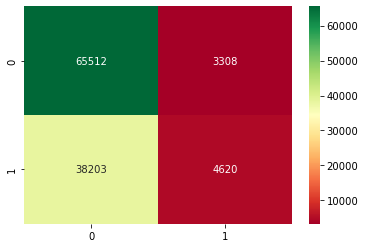

In [ ]:
sns.heatmap(cm, annot=True, fmt='.0f',cmap="RdYlGn")

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_const, predictions))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76     68820
           1       0.58      0.11      0.18     42823

    accuracy                           0.63    111643
   macro avg       0.61      0.53      0.47    111643
weighted avg       0.61      0.63      0.54    111643



In [ ]:
f1_score(y_test_const, predictions)

# Weighted Techniques of models
LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier with balanced class weights
lr = LogisticRegression(class_weight='balanced')

# Fit the model to the training data
lr.fit(X_train_const, y_train_const)

# Predict on the test data
y_pred = lr.predict(X_test_const)

# Print the classification report
print(classification_report(y_test_const, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67     68820
           1       0.45      0.39      0.42     42823

    accuracy                           0.58    111643
   macro avg       0.55      0.55      0.55    111643
weighted avg       0.57      0.58      0.57    111643



In [ ]:
print(confusion_matrix(y_test_const, y_pred))

In [ ]:
print(f1_score(y_test_const, y_pred))

# 3. Log Reg - Recursive Feature Elimination (RFE)

In [ ]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 

X_train_rfe = X_train_const.iloc[:,1:]
X_test_rfe = X_test_const.iloc[:,1:]

# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg, n_features_to_select = 10)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train_const)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Year of Birth', 'Race', 'State', 'County', 'ChronicCond_Depression',
       'ChronicCond_Osteoporasis', 'TotalReimbursement',
       'IPAnnualDeductibleAmt', 'OPAnnualDeductibleAmt',
       'TotalDeductibleamount'],
      dtype='object')


Build the logisitc regression model using the variables obtained from RFE.¶

In [ ]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# consider the variables obtained from RFE method and the intercept term


logreg_rfe = sm.Logit(y_train_const, X_train_const[['Race', 'State', 'County', 'ChronicCond_Alzheimer',
       'ChronicCond_Depression', 'ChronicCond_rheumatoidarthritis',
       'PatientRiskScore', 'TotalReimbursement', 'OPAnnualDeductibleAmt',
       'TotalDeductibleamount']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.667614
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         PotentialFraud   No. Observations:               446568
Model:                          Logit   Df Residuals:                   446558
Method:                           MLE   Df Model:                            9
Date:                Wed, 26 Apr 2023   Pseudo R-squ.:               -0.004887
Time:                        07:49:53   Log-Likelihood:            -2.9813e+05
converged:                       True   LL-Null:                   -2.9669e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Race                                0.0194      0.004      4.590  

Interpretation: The Pseudo R-squ. obtained from the above model summary is the value of McFadden's R-squared. This value can be obtained from the formula:

McFadden's R-squared =  1−𝐿𝑜𝑔−𝐿𝑖𝑘𝑒𝑙𝑖ℎ𝑜𝑜𝑑𝐿𝐿−𝑁𝑢𝑙𝑙 

Where,
Log-Likelihood: It is the maximum value of the log-likelihood function
LL-Null: It is the maximum value of the log-likelihood function for the model containing only the intercept

The LLR p-value is less than 0.05, implies that the model is significant.

There are different types of pseudo R-squared such as Cox & Snell R-squared, Nagelkerke R-squared and so on.

In [ ]:
y_pred_prob_rfe = logreg_rfe.predict(X_test_const[['Race', 'State', 'County', 'ChronicCond_Alzheimer',
       'ChronicCond_Depression', 'ChronicCond_rheumatoidarthritis',
       'PatientRiskScore', 'TotalReimbursement', 'OPAnnualDeductibleAmt',
       'TotalDeductibleamount']])

# print the y_pred_prob_rfe
y_pred_prob_rfe

355816    0.393618
361712    0.418950
68901     0.321580
417661    0.399150
252020    0.449854
            ...   
164731    0.301458
90116     0.378489
225146    0.447075
312732    0.459660
140237    0.285913
Length: 111643, dtype: float64

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_rfe = [ 0 if x < 0.62 else 1 for x in y_pred_prob_rfe]

In [ ]:
# Predict on the test data
y_pred_rfe = lr.predict(X_test_const)

result = classification_report(y_test_const, y_pred_rfe)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.65      0.70      0.67     68820
           1       0.45      0.39      0.42     42823

    accuracy                           0.58    111643
   macro avg       0.55      0.55      0.55    111643
weighted avg       0.57      0.58      0.57    111643



In [ ]:
print("roc_auc_score:",metrics.roc_auc_score(y_test_const, y_pred_rfe))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test_const, y_pred_rfe))

roc_auc_score: 0.5451873593569193
cohen_kappa_score: 0.09244690364806407


In [ ]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [ ]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

# Decision Tree - GridSearchCV

Tune the Hyperparameters using GridSearchCV (Decision Tree)
Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. We pass some of the hyperparameters in the decision tree to the GridSearchCV() and build the tree using the optimal values obtained using GridSearch method.

In [ ]:
y = df_final_num.PotentialFraud

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (446568, 28)
y_train (446568,)
X_test (111643, 28)
y_test (111643,)


In [ ]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree

decisiontree = DecisionTreeClassifier() #class_weight = 'balanced'

parameters = {'criterion':['gini','entropy'], 'max_depth': [5, 10, 50, 100, 150, 200, 250, 500], 'min_samples_split': [5, 10, 50, 100, 150, 200, 250, 500]}

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
decisiontree_gs = GridSearchCV(decisiontree, parameters, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)


# fit the model on X_train and y_train using fit()
decisiontree_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 50, 100, 150, 200, 250, 500],
                         'min_samples_split': [5, 10, 50, 100, 150, 200, 250,
                                               500]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print("best parameters = ",decisiontree_gs.best_params_)
print("roc_auc_score :",decisiontree_gs.best_score_)

best parameters =  {'criterion': 'gini', 'max_depth': 150, 'min_samples_split': 250}
roc_auc_score : 0.8268305007755974


In [ ]:
#Predict the response for test dataset
y_pred = decisiontree_gs.predict(X_test)

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]

In [ ]:
acc_table = classification_report(y_test, y_pred_prob)
print(acc_table)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     68820
           1       0.73      0.65      0.68     42823

    accuracy                           0.77    111643
   macro avg       0.76      0.75      0.75    111643
weighted avg       0.77      0.77      0.77    111643



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_prob))
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.7700527574500864
roc_auc_score: 0.7464559762408259


Interpretation: The accuracy of the test dataset 0.77 after tuning of the hyperparameters. Also, the sensitivity and specificity of the model are balanced.

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes.

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree.

# Random Forest Model

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [ ]:
# Calculate performance measures on the test set.
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.75      0.80      0.77     68820
           1       0.63      0.56      0.60     42823

    accuracy                           0.71    111643
   macro avg       0.69      0.68      0.68    111643
weighted avg       0.70      0.71      0.70    111643



Interpretation: The accuracy of the test dataset is 0.77 after tuning of the hyperparameters.

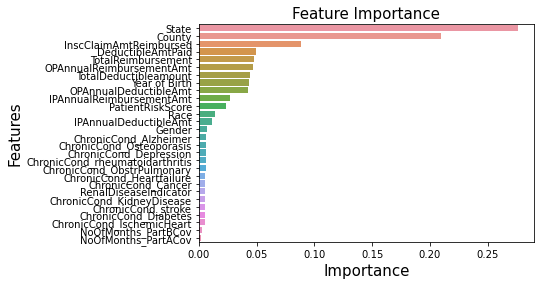

In [ ]:
# 'feature_importances_' returns the features based on the gini importance

random_forest_tuned_model = RandomForestClassifier(criterion = 'entropy', max_depth = 15, 
                                                   min_samples_split = 2, n_estimators = 90,
                                                   random_state = 10)

random_forest_tuned_model = random_forest_tuned_model.fit(X_train, y_train)

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': random_forest_tuned_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# Selection of Model¶

After evaluating all the models on the test dataset, we can conclude that the Decision Tree - GridsearchCV model works well on the data set with an accuracy score of 77 percent, recall value of 84 percent, F1 score of 82 percent, and kappa score of 74 percent.

# Results & Discussion

In order to discuss the results in detail, the decision tree model with GridsearchCV, which has an accuracy score of 77%, was ultimately chosen. 77% of the predictions made by the model were accurate. A model is better when its accuracy value is relatively high.

The chosen model's kappa score is 0.746, which is very close to 0.8, and we can infer that the inter-rater reliability is high. The measure of separability between the classes in a target variable is 76 percent according to the auc score, which is around 76 percent. The auc score in the grid search CV is higher than the scores of the other models. One issue we would like to address is the fact that because the data set is so large, codes like hyper parameter tuning,selecting important feature and even GridsearchCV often have trouble running or take too long to complete, which prevents us from testing new strategies constantly.


# conclusion 